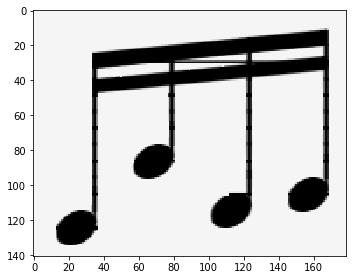

In [42]:
from skimage import io

img = io.imread('beams.png')
io.imshow(img)

In [43]:
from commonfunctions import *

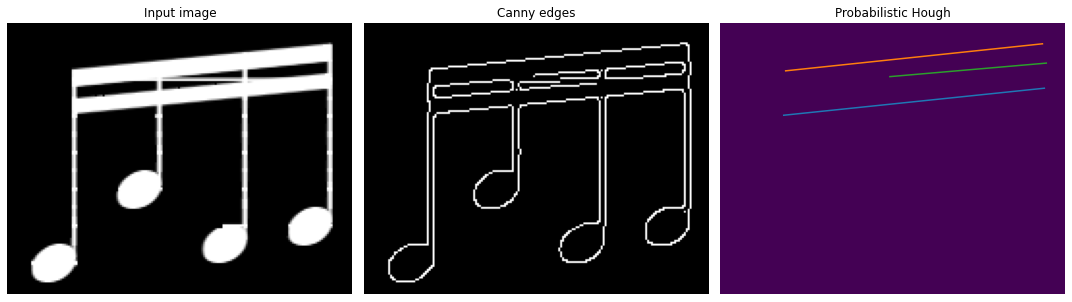

In [44]:
from skimage.transform import probabilistic_hough_line
from skimage.feature import canny
from skimage.color import rgb2gray
from skimage.morphology import skeletonize, thin
from statistics import median

# Line finding using the Probabilistic Hough Transform
# image = data.camera()

image = 1-rgb2gray(img)
edges = canny(image,sigma=1)
# edges = skeletonize(image)
lines = probabilistic_hough_line(edges)

slopes = []
lengths = []
for i in lines:
    if i[0][0] != i[1][0]:
        slopes.append((i[1][1] - i[0][1]) / (i[1][0] - i[0][0]))
    else:
        slopes.append(np.Inf)
        
    lengths.append( (i[1][1] - i[0][1])**2 + (i[1][0] - i[0][0])**2 )

med_len = median(lengths)

new_lines = []

for i in range(len(lengths)):
    if(med_len <= lengths[i] and slopes[i] != np.Inf):
        new_lines.append(lines[i])
        
lines = new_lines

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()
# io.imsave('out.png',arr=edges)
    
plt.tight_layout()
plt.show()


In [101]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from skimage.morphology import (square, rectangle, diamond, disk, cube,
                                octahedron, ball, octagon, star)

# # Generate 2D and 3D structuring elements.
# struc_2d = {
#     "square(15)": square(15),
#     "rectangle(15, 10)": rectangle(15, 10),
#     "diamond(7)": diamond(7),
#     "disk(7)": disk(7),
#     "octagon(7, 4)": octagon(7, 4),
#     "star(5)": star(5)
# }



In [292]:
from skimage.morphology import binary_opening, binary_closing, binary_erosion, skeletonize,thin

def structured(image):
    opened = binary_erosion(image, selem=star(1))
    opened = 255 - img_as_ubyte(opened)

    s = np.zeros(shape = (1,9))

    s[:,:] = 1
#     print(s)

    opened = binary_erosion(opened, selem = s)
    opened = binary_opening(opened, selem=star(2))

    return opened

In [287]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure

def plot_contours(img, rect = True):
    # Find contours at a constant value of 0.8
    contours = measure.find_contours(img, 0.8)
    
    if rect:
        rect_contours = []
        for contour in contours:
            min_x = contour[0][0]
            max_x = contour[0][0]
            min_y = contour[0][1]
            max_y = contour[0][1]
            for point in contour:
                if point[0] > max_x:
                    max_x = point[0]
                if point[0] < min_x:
                    min_x = point[0]
                if point[1] > max_y:
                    max_y = point[1]
                if point[1] < min_y:
                    min_y = point[1]
            rect_contours.append(np.array([[max_x, max_y],[min_x, max_y], [min_x, min_y],[max_x, min_y],[max_x, max_y] ]))
        contours = rect_contours
    fig, ax = plt.subplots()
    ax.imshow(img, cmap=plt.cm.gray)
    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

    ax.axis('image')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()
    return contours


In [288]:
def beam_or_circle(contour):
    max_p = contour[0]
    min_p = contour[2]
    
    L = max_p[0] - min_p[0]
    W = max_p[1] - min_p[1]
    
    center = ((max_p[0]+min_p[0]) / 2 , (max_p[1]+min_p[1]) / 2)
    typ = "circle"
    if W > 2 * L:
        typ = "beam"
    
    return typ, center

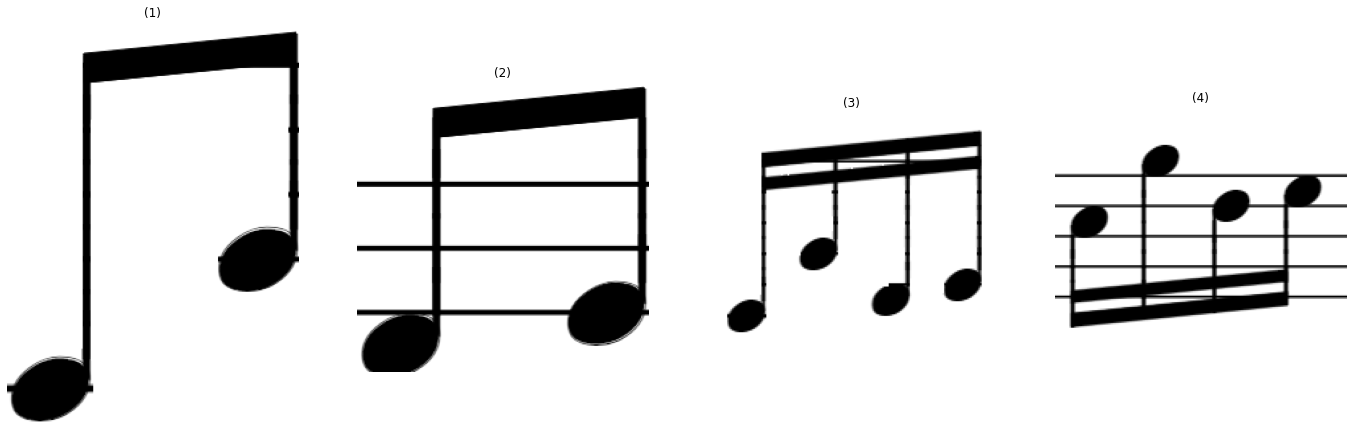

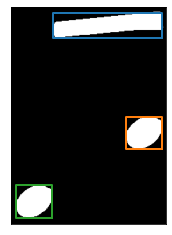

('beam', (26.0, 137.5))
('circle', (179.0, 188.5))
('circle', (276.0, 32.5))


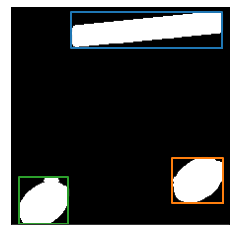

('beam', (23.0, 137.5))
('circle', (176.0, 189.5))
('circle', (196.4, 33.0))


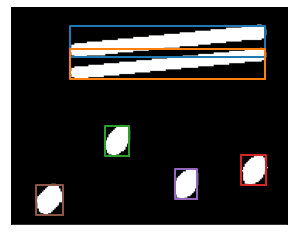

('beam', (22.0, 101.0))
('beam', (36.5, 101.0))
('circle', (86.5, 68.5))
('circle', (105.5, 157.0))
('circle', (114.5, 113.0))
('circle', (124.5, 24.5))


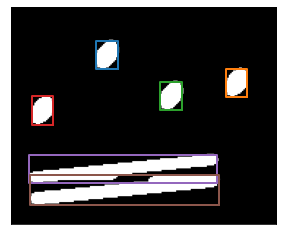

('circle', (32.5, 65.5))
('circle', (51.5, 154.0))
('circle', (60.5, 109.5))
('circle', (70.5, 21.0))
('beam', (110.5, 76.5))
('beam', (125.0, 77.5))


In [295]:
test_images = ['t1.png', 't2.png', 'beams.png', 'beams2.png']

for i in range(len(test_images)):
    test_images[i] = io.imread(test_images[i], as_gray=True)

show_images(test_images)

for img in test_images:
    structured_img = structured(img)
    contours = plot_contours(structured_img)
    for contour in contours:
        print(beam_or_circle(contour))

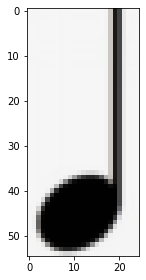

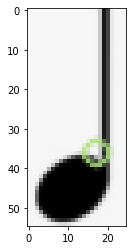

In [123]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
from skimage import img_as_ubyte
%matplotlib inline

# x = np.array(edges).astype(int)
# x[x==1]=255

img1 = io.imread('noire.jpg')
img1 = resize(img1, output_shape = (551//10, 253//10, img1.shape[2]))
y_copy= img_as_ubyte(img1)
gray= cv.cvtColor(y_copy,cv.COLOR_BGR2GRAY)
io.imshow(img1)

sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray,None)
img1=cv.drawKeypoints(gray,kp1,img1)
plt.figure()
plt.imshow(img1)

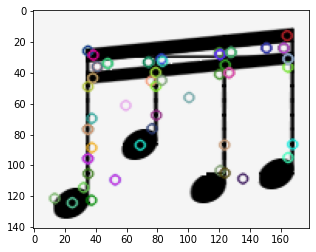

In [127]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img2 = cv.imread('beams.png')
gray= cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp2, des2 = sift.detectAndCompute(gray,None)
img2=cv.drawKeypoints(gray,kp2,img)
plt.figure()
plt.imshow(img2)

In [40]:
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

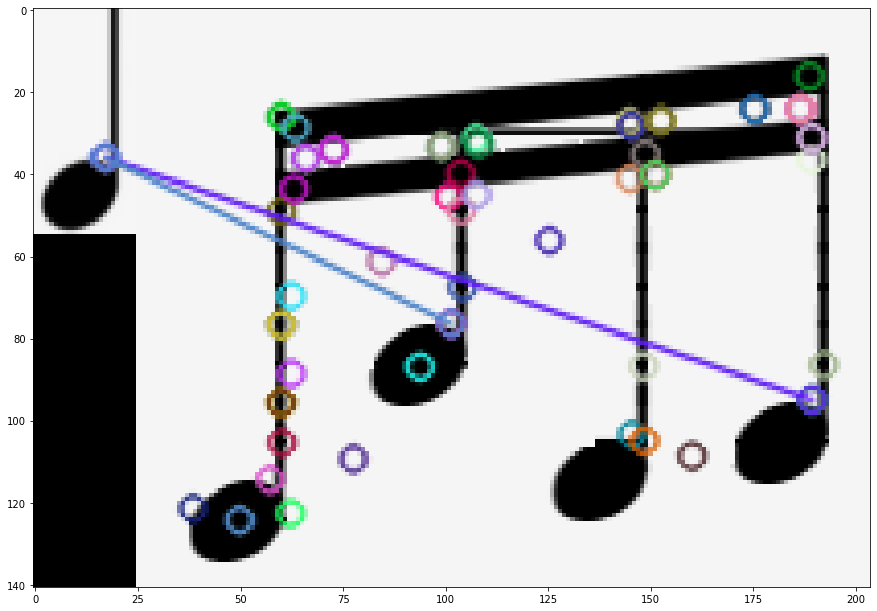

(<matplotlib.image.AxesImage at 0x203a6706640>, None)

In [41]:
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

outImg = img1
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,flags=2, outImg=outImg)

plt.figure(figsize=(15, 15))
plt.imshow(img3),plt.show()

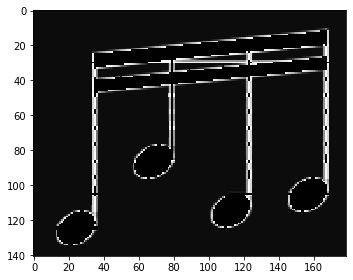

In [37]:
#!/usr/bin/python

# Standard imports
import cv2
import numpy as np

# Read image
im =1 - cv2.imread("beams.png", cv2.IMREAD_GRAYSCALE)

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 200


# Filter by Area.
params.filterByArea = True
params.minArea = 1500

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87
    
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
	detector = cv2.SimpleBlobDetector(params)
else : 
	detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(im)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show blobs
# cv2.imshow("Keypoints", im_with_keypoints)
# cv2.waitKey(0)
io.imshow(im_with_keypoints)


In [ ]:
from skimage.transform import probabilistic_hough_line
from skimage.feature import canny
from skimage.color import rgb2gray
from skimage.morphology import skeletonize, thin
from statistics import median

# Line finding using the Probabilistic Hough Transform
# image = data.camera()
image = im_with_keypoints
edges = rgb2gray(image)
# edges = skeletonize(image)
lines = probabilistic_hough_line(edges)

slopes = []
lengths = []
for i in lines:
    if i[0][0] != i[1][0]:
        slopes.append((i[1][1] - i[0][1]) / (i[1][0] - i[0][0]))
    else:
        slopes.append(np.Inf)
        
    lengths.append( (i[1][1] - i[0][1])**2 + (i[1][0] - i[0][0])**2 )

med_len = median(lengths)

new_lines = []

for i in range(len(lengths)):
    if(med_len <= lengths[i] and slopes[i] != np.Inf):
        new_lines.append(lines[i])
        
lines = new_lines

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

    
plt.tight_layout()
plt.show()
